In this project, we will perform data science project on income classification to classify if a person earns more than **50K** per year.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income_evaluation.csv')

In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
df.isnull().any()

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

There is a column that has a rather obscure name: `fnlwgt`. Upon closer inspection, this variable is translated as **final weight** which represents the total number of people matching that particular row of information. Another thing to note is that **each name** has a space in front of it. We need to delete it:

In [7]:
cols = {'age': 'age',' workclass': 'workclass',' fnlwgt': 'final_weight',
        ' education': 'education',' education-num': 'education_num',
        ' marital-status': 'marital_status',' occupation': 'occupation',
        ' relationship': 'relationship',' race': 'race',' sex': 'sex',
        ' capital-gain': 'capital_gain',' capital-loss': 'capital_loss',
        ' hours-per-week': 'hrs_per_week',' native-country': 'native_country',
        ' income': 'income'}

df = df.rename(columns=cols)

In [8]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

Some of the variables have **binary** or **discrete** values. We can apply to encode or transform some of the variables from **string** to **category**. Since `income` is our target variables, we want it to be numeric for ease of calculation. We are going to create new variables derived from `income`:

In [9]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
df['income_encoded'] = [1 if value == ' >50K' else 0 for value in df['income'].values]

In [11]:
df['income_encoded'].unique()

array([0, 1], dtype=int64)

In [12]:
# Let's check some descriptive statistics
df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hrs_per_week,income_encoded
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Observations from the above statistics:

1. In the dataset the **mean** and **median** `age` are similar. We doubt, it will be a normal distribution. We will check it later using visualizations.
2. The variables of `capital gain` and `loss` are suspect. All observations greater than `0` are in the 4th quartile.
3. In the `hrs_per_week` columns, the **min** is `1` and the **max** is `99`, which is not common in real life. We will have to investigate this later.
4. Only about a quarter of the `population` can earn more than `50,000` a year.

### Income Classification

Let’s see how each profession plays out by comparing the number of people earning over `50K`. We’ll look at the **total number of people** for each area and the **total number of people** earning over `50K` in each:

In [13]:
df[df['income'] == ' >50K']['occupation'].value_counts().head(3)

 Exec-managerial    1968
 Prof-specialty     1859
 Sales               983
Name: occupation, dtype: int64

In [18]:
pd.crosstab(df["occupation"], df['income'])

income,<=50K,>50K
occupation,,
?,1652,191
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137


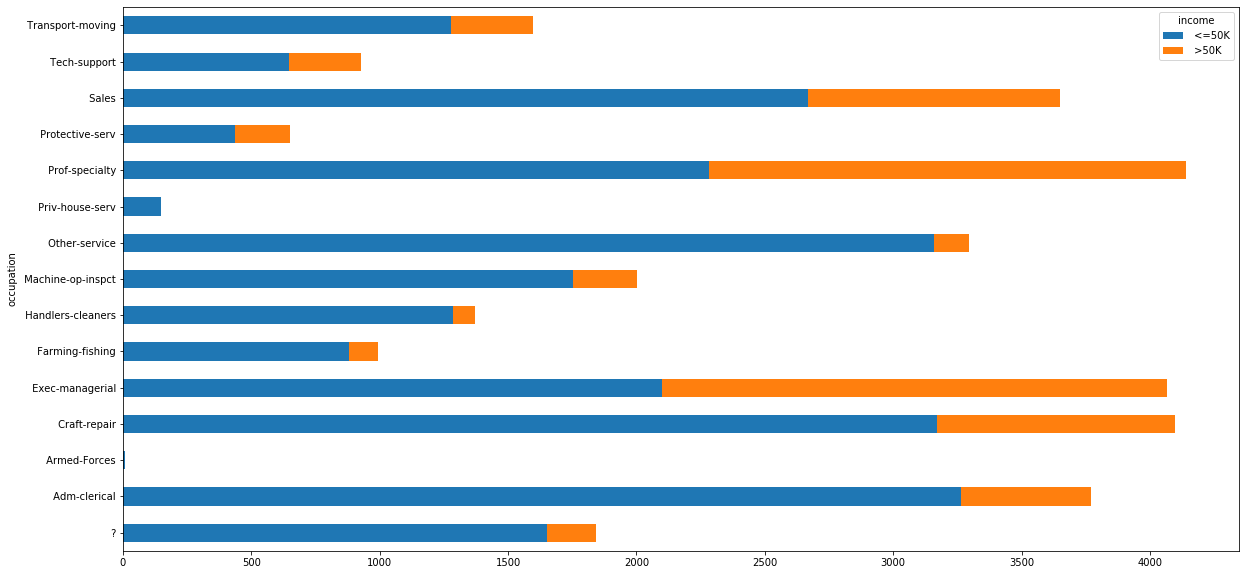

In [15]:
pd.crosstab(df["occupation"], df['income']).plot(kind='barh',
                                                 stacked=True, 
                                                 figsize=(20, 10))
plt.show()

### Observations:

1. Three main occupations in total numbers are;
    * professional speciality 
    * home repair
    * executive management.
    
    
2. Top 3 occupations in terms of a total number of people earning more than 50K (in order) are; 

    * Executive
    * Occupational Specialties and 
    * Handicraft Sales and Repairs (with a close margin).
    
    
3. **Senior executives** have the highest percentage of people earning more than `50,000` i.e. `48%` `(1968/(2098+1968))`.